In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2016-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2016_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8581,남구,14850,남구,6269,73.06%,"11,716"
1,2016-01-07,간장,오복왕표 0.9ℓ 1병,6061,남구,6250,남구,189,3.12%,"6,156"
2,2016-01-07,고등어,30㎝정도 500g 1마리,3300,남구,4375,남구,1075,32.58%,"3,838"
3,2016-01-07,달걀,오경슈퍼란60g정도 10개,2580,남구,2600,남구,20,0.78%,"2,590"
4,2016-01-07,닭고기,육계 1.0㎏,4800,남구,5980,남구,1180,24.58%,"5,390"
5,2016-01-07,대파,1.0㎏,3815,남구,4948,남구,1133,29.7%,"4,382"
6,2016-01-07,돼지고기,삼겹살 500g,9500,남구,9500,남구,0,0.0%,"9,500"
7,2016-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4089,남구,5300,남구,1211,29.62%,"4,695"
8,2016-01-07,라면,신라면 120g 1봉지,630,남구,630,남구,0,0.0%,630
9,2016-01-07,맥주,하이트 500㎖ 1병,1240,남구,1240,남구,0,0.0%,"1,240"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2016-04-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2016_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-04-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8581,남구,17850,남구,9269,108.02%,"13,216"
1,2016-04-07,간장,오복왕표 0.9ℓ 1병,6061,남구,6250,남구,189,3.12%,"6,156"
2,2016-04-07,고등어,30㎝정도 500g 1마리,4620,남구,6980,남구,2360,51.08%,"5,800"
3,2016-04-07,달걀,오경슈퍼란60g정도 10개,2480,남구,2580,남구,100,4.03%,"2,530"
4,2016-04-07,닭고기,육계 1.0㎏,5800,남구,7228,남구,1428,24.62%,"6,514"
5,2016-04-07,대파,1.0㎏,4966,남구,5102,남구,136,2.74%,"5,034"
6,2016-04-07,돼지고기,삼겹살 500g,9600,남구,9950,남구,350,3.65%,"9,775"
7,2016-04-07,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5300,남구,935,21.42%,"4,833"
8,2016-04-07,라면,신라면 120g 1봉지,630,남구,630,남구,0,0.0%,630
9,2016-04-07,맥주,하이트 500㎖ 1병,1240,남구,1240,남구,0,0.0%,"1,240"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2016-07-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2016_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-07-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8581,남구,1156,15.57%,"8,003"
1,2016-07-07,간장,오복왕표 0.9ℓ 1병,6061,남구,6250,남구,189,3.12%,"6,156"
2,2016-07-07,고등어,30㎝정도 500g 1마리,2280,남구,2768,남구,488,21.4%,"2,524"
3,2016-07-07,달걀,오경슈퍼란60g정도 10개,2480,남구,2480,남구,0,0.0%,"2,480"
4,2016-07-07,닭고기,육계 1.0㎏,4276,남구,5580,남구,1304,30.5%,"4,928"
5,2016-07-07,대파,1.0㎏,3242,남구,3633,남구,391,12.06%,"3,438"
6,2016-07-07,돼지고기,삼겹살 500g,11000,남구,11950,남구,950,8.64%,"11,475"
7,2016-07-07,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5300,남구,935,21.42%,"4,833"
8,2016-07-07,라면,신라면 120g 1봉지,590,남구,590,남구,0,0.0%,590
9,2016-07-07,맥주,하이트 500㎖ 1병,1240,남구,1240,남구,0,0.0%,"1,240"


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2016-10-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2016_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-10-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6906,남구,14850,남구,7944,115.03%,"10,878"
1,2016-10-06,간장,오복왕표 0.9ℓ 1병,6061,남구,6250,남구,189,3.12%,"6,156"
2,2016-10-06,고등어,30㎝정도 500g 1마리,3142,남구,3645,남구,503,16.01%,"3,394"
3,2016-10-06,달걀,오경슈퍼란60g정도 10개,2490,남구,2580,남구,90,3.61%,"2,535"
4,2016-10-06,닭고기,육계 1.0㎏,4850,남구,6657,남구,1807,37.26%,"5,754"
5,2016-10-06,대파,1.0㎏,4466,남구,6191,남구,1725,38.63%,"5,329"
6,2016-10-06,돼지고기,삼겹살 500g,7900,남구,9950,남구,2050,25.95%,"8,925"
7,2016-10-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,남구,5300,남구,935,21.42%,"4,833"
8,2016-10-06,라면,신라면 120g 1봉지,630,남구,630,남구,0,0.0%,630
9,2016-10-06,맥주,하이트 500㎖ 1병,1240,남구,1240,남구,0,0.0%,"1,240"


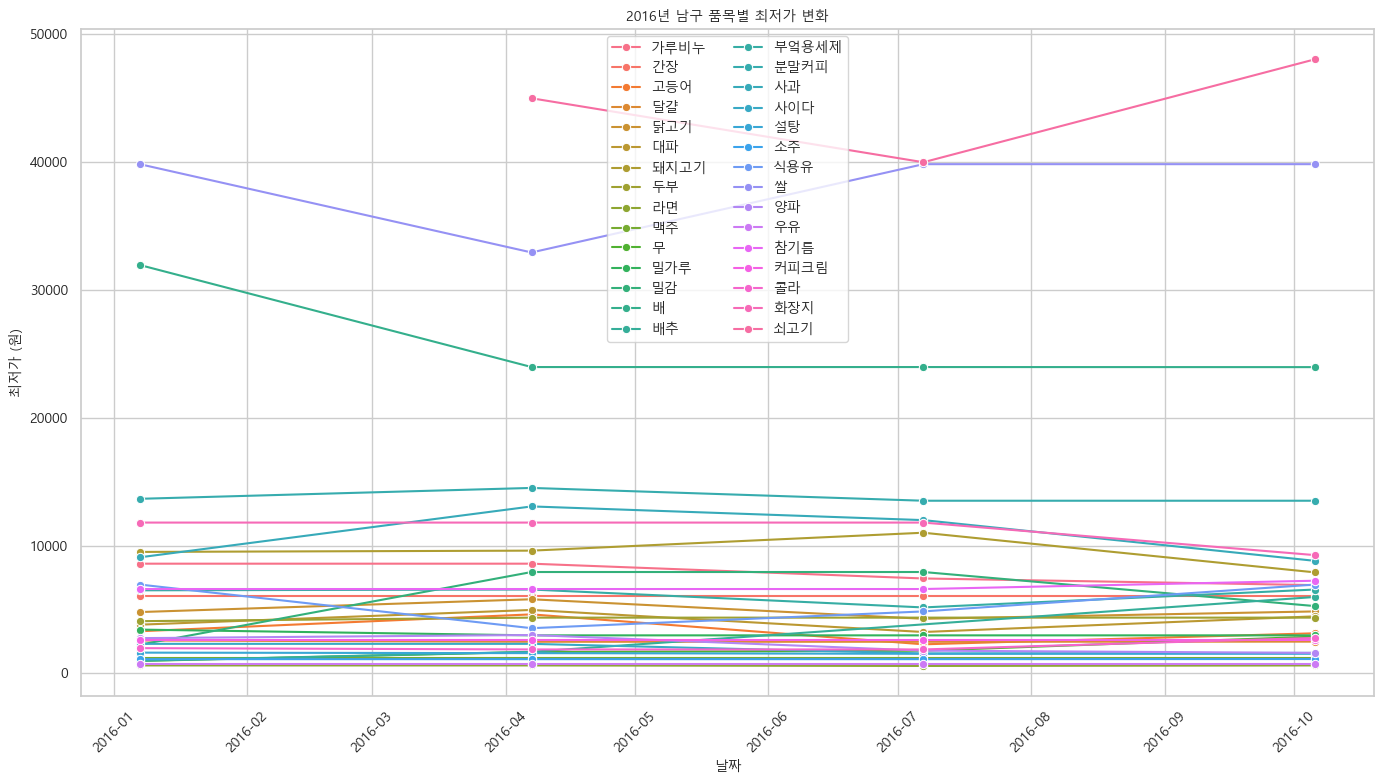

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2016_1q.csv")
q2 = pd.read_csv("남구2016_2q.csv")
q3 = pd.read_csv("남구2016_3q.csv")
q4 = pd.read_csv("남구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2016_min.csv", index=False, encoding="utf-8-sig")

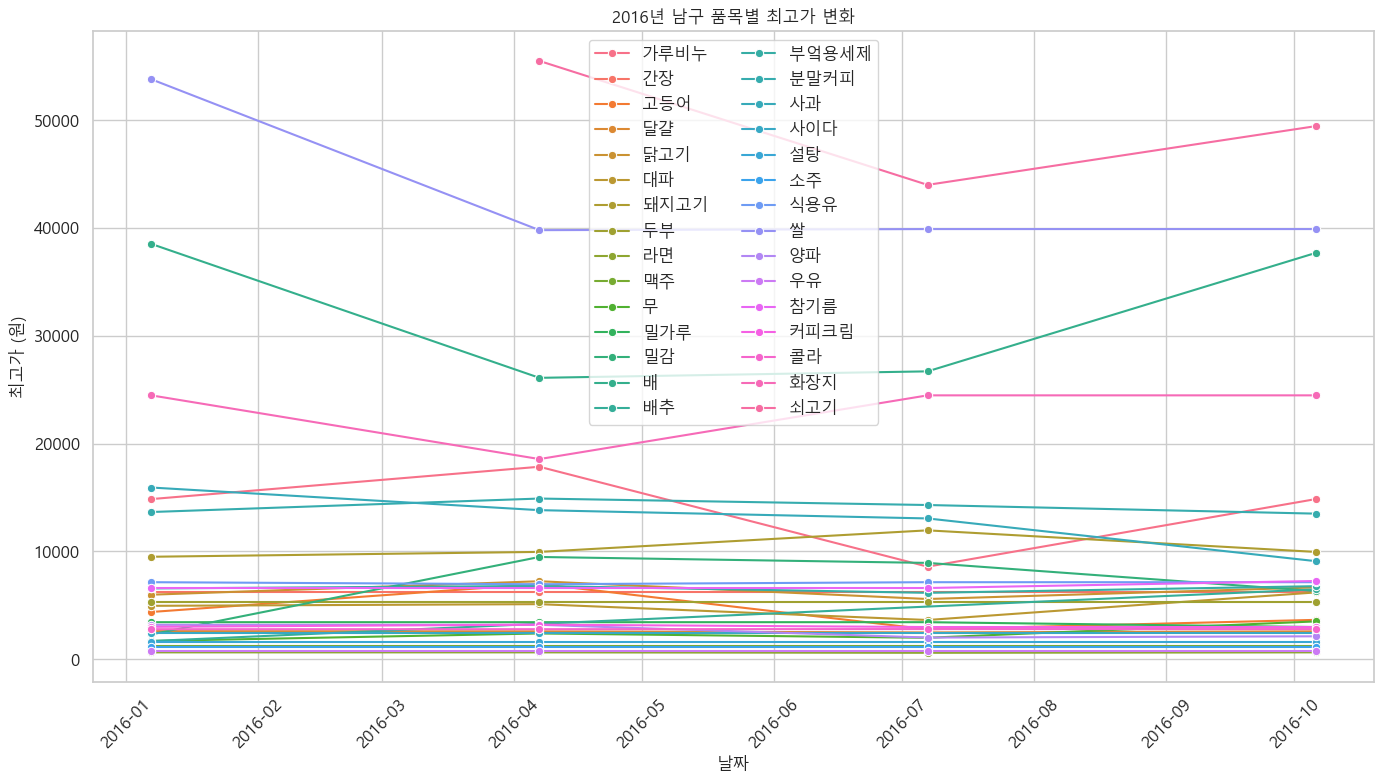

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2016_1q.csv")
q2 = pd.read_csv("남구2016_2q.csv")
q3 = pd.read_csv("남구2016_3q.csv")
q4 = pd.read_csv("남구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2016_max.csv", index=False, encoding="utf-8-sig")